# Test Slices of NIFTI Images
Zitian Tang\
09-18-2021

In [1]:
import numpy as np
import pandas as pd
import os
import random

## Plot ##
import matplotlib.pyplot as plt

## PyTorch ##
import torch

## TorchVision ##
import torchvision

## Nibabel ##
import nibabel as nib

# User Variables

In [2]:
## Image Directory ##
image_directory = '../data/CT_images/COVID19_1110/studies' # parent direcotry
CT0_dir = os.path.join(image_directory, 'CT-0')
CT1_dir = os.path.join(image_directory, 'CT-1')
CT2_dir = os.path.join(image_directory, 'CT-2')
CT3_dir = os.path.join(image_directory, 'CT-3')
CT4_dir = os.path.join(image_directory, 'CT-4')

## Num of patients needed to plot ##
total_patients = 16

### Generate Random Image

In [3]:
## CT-0: 5 patients ##
CT0_random_imgID = random.sample(range(1,254), 5)

## CT-1: 3 patients ##
CT1_random_imgID = random.sample(range(255,938), 3)

## CT-2: 3 patients ##
CT2_random_imgID = random.sample(range(939,1063), 3)

## CT-3: 3 patients ##
CT3_random_imgID = random.sample(range(1064,1108), 3)

## CT-4: 2 patients ##
CT4_random_imgID = [1109,1110]

In [4]:
## Total ##
CT_random_imgID = CT0_random_imgID + CT1_random_imgID + CT2_random_imgID + CT3_random_imgID + CT4_random_imgID

for i in range(len(CT_random_imgID)):
    curr = CT_random_imgID[i]
    CT_random_imgID[i] = f'{curr}'
    while len(CT_random_imgID[i]) < 4:
        CT_random_imgID[i] = '0' + CT_random_imgID[i]
        
print(CT_random_imgID)

['0141', '0083', '0114', '0225', '0204', '0788', '0708', '0648', '0982', '0991', '0998', '1072', '1095', '1087', '1109', '1110']


In [5]:
## Get filelist ##

## Adjoint relative path to parent path ##
for i in range(16):
    curr = CT_random_imgID[i]
    if i <= 4:
        CT_random_imgID[i] = os.path.join(CT0_dir, 'study_'+curr+'.nii.gz')
    elif 4<i<8:
        CT_random_imgID[i] = os.path.join(CT1_dir, 'study_'+curr+'.nii.gz')
    elif 7<i<11:
        CT_random_imgID[i] = os.path.join(CT2_dir, 'study_'+curr+'.nii.gz')
    elif 10<i<14:
        CT_random_imgID[i] = os.path.join(CT3_dir, 'study_'+curr+'.nii.gz')
    else:
        CT_random_imgID[i] = os.path.join(CT4_dir, 'study_'+curr+'.nii.gz')

## Image Grid

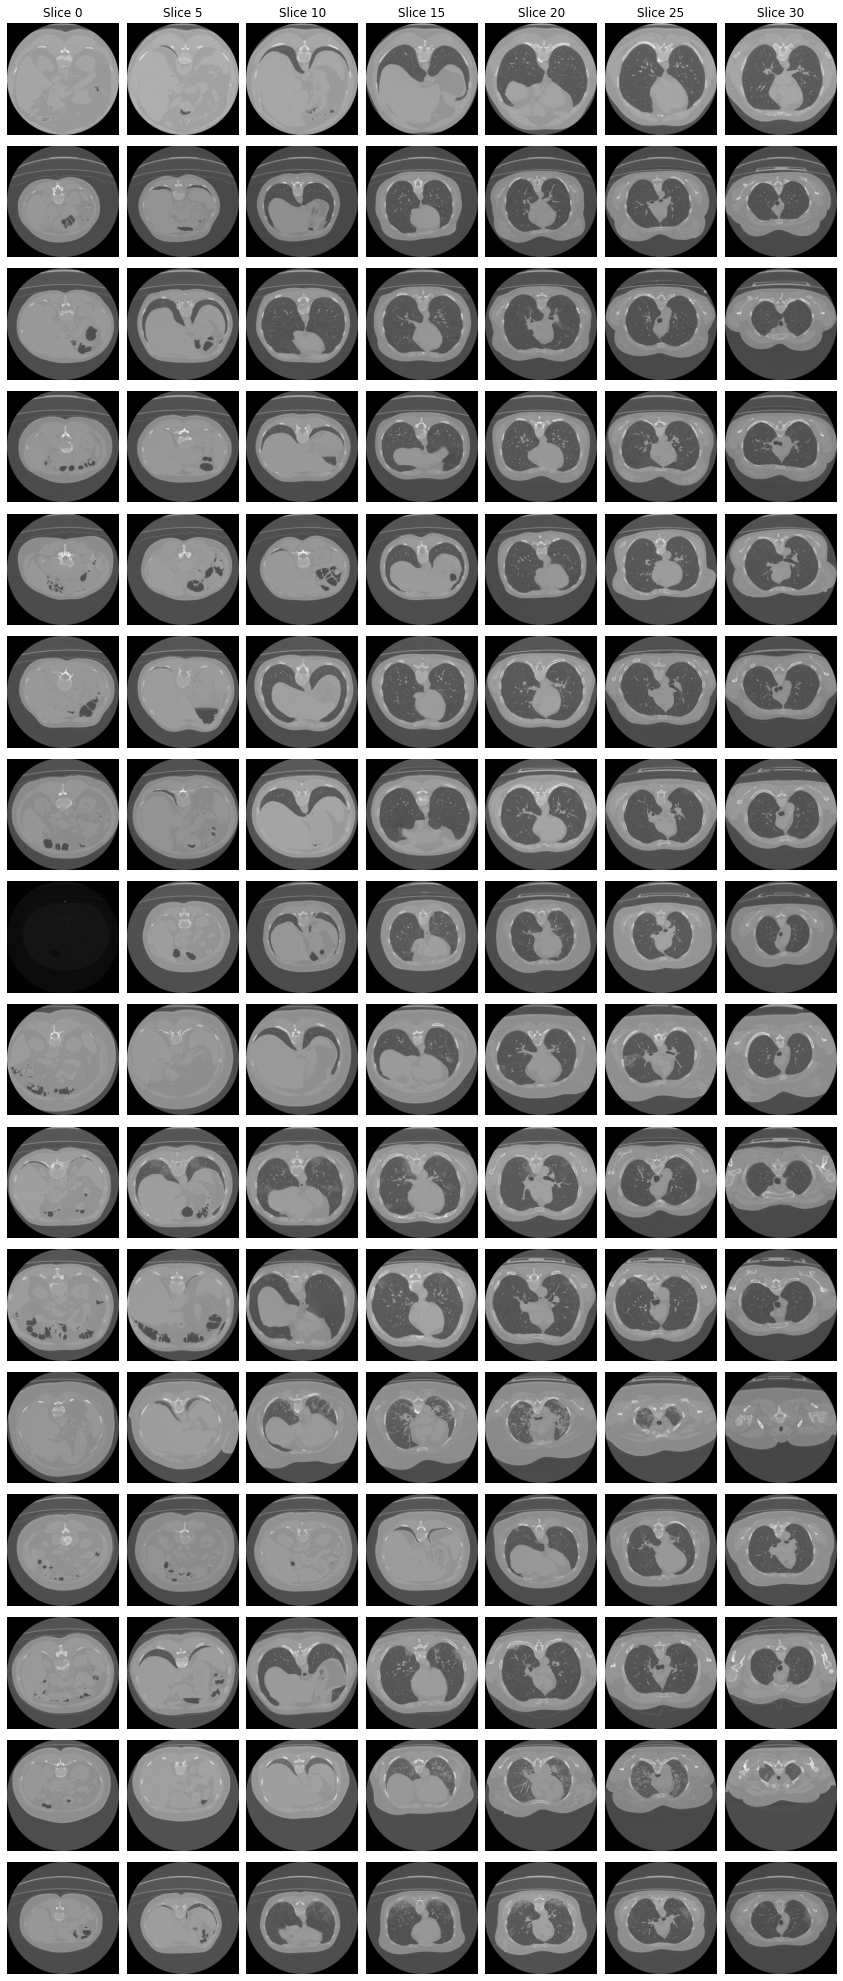

In [9]:
## Plot Image Grid ##
## Quilt rows and columns ##
nRows = total_patients
nCols = 7
## Spacers ##
wspace = 0.
hspace = 0.10
## Quilt width and height ##
figsize_x = 15+(wspace*nCols)
figsize_y = 15*(nRows/nCols)+(hspace*nRows)

## Plotting ##

## Plot Tiles ##
fig, ax = plt.subplots(nrows=nRows, ncols=nCols,
                       figsize=(figsize_x, figsize_y),
                       gridspec_kw = {'wspace':wspace, 'hspace':hspace})

## Rows and Cols label ##
colnames = ['Slice {}'.format(c) for c in [0,5,10,15,20,25,30]]
for axs, c in zip(ax[0], colnames):
    axs.set_title(c)

## Iterate Across Images ##
for i in range(nRows): # ith row represent ith patient; image retrived from CT_random_imgID[i]
    data = nib.load(CT_random_imgID[i])
    data = data.get_fdata()
    for j in range(nCols): # jth col represent (5j)th slice
        current_slice = data[:,:,5*j]
        ax[i, j].imshow(np.moveaxis(current_slice, 0, -1), cmap="gray");
        ax[i, j].axis('off')